In [8]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from pathlib import Path

In [9]:
# plt.rcParams['figure.figsize'] = [60, 30]

In [10]:
def nlm_denoise_edge_detection(path):
    img = cv2.imread(path)
    b,g,r = cv2.split(img)           # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb

    # Denoising
    nlm_img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    b,g,r = cv2.split(nlm_img)           # get b,g,r
    rgb_nlm_img = cv2.merge([r,g,b])     # switch it to rgb
    
    edges = cv2.Canny(img,None,100,200,3,True)
    nlm_edges = cv2.Canny(nlm_img,None,100,200,3,True)
    
    return edges, nlm_edges

In [11]:
def denoise_gray_img(path):
    img = cv2.imread(path)
    ori_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    denoised_gray = cv2.cvtColor(nlm_img, cv2.COLOR_BGR2GRAY)
    plt.subplot(211),plt.imshow(ori_gray, cmap='gray')
    plt.subplot(212),plt.imshow(denoised_gray, cmap='gray')
    plt.show()

In [14]:
cwd = os.getcwd()
# print(cwd)
base_img_path = cwd+'/../data/IM_'

edges = []
nlm_edges = []
num_images = 15

for i in range(num_images):
    image_idx = str(i).zfill(2)
    print(f'Processing IM_{image_idx}...')
    img_path = base_img_path + image_idx +'.jpg'
    edge, nlm_edge = nlm_denoise_edge_detection(img_path)
    edges.append(edge)
    nlm_edges.append(nlm_edge)

    
#plt.subplot(211),plt.imshow(edges,cmap = 'gray')
#plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(212),plt.imshow(nlm_edges,cmap = 'gray')
#plt.title('NLM-denoised Edge Image'), plt.xticks([]), plt.yticks([])

#plt.show()

#plt.subplot(211),plt.imshow(rgb_img)
#plt.subplot(212),plt.imshow(rgb_nlm_img)
#plt.show()

Processing IM_00...
Processing IM_01...
Processing IM_02...
Processing IM_03...
Processing IM_04...
Processing IM_05...
Processing IM_06...
Processing IM_07...
Processing IM_08...
Processing IM_09...
Processing IM_10...
Processing IM_11...
Processing IM_12...
Processing IM_13...
Processing IM_14...


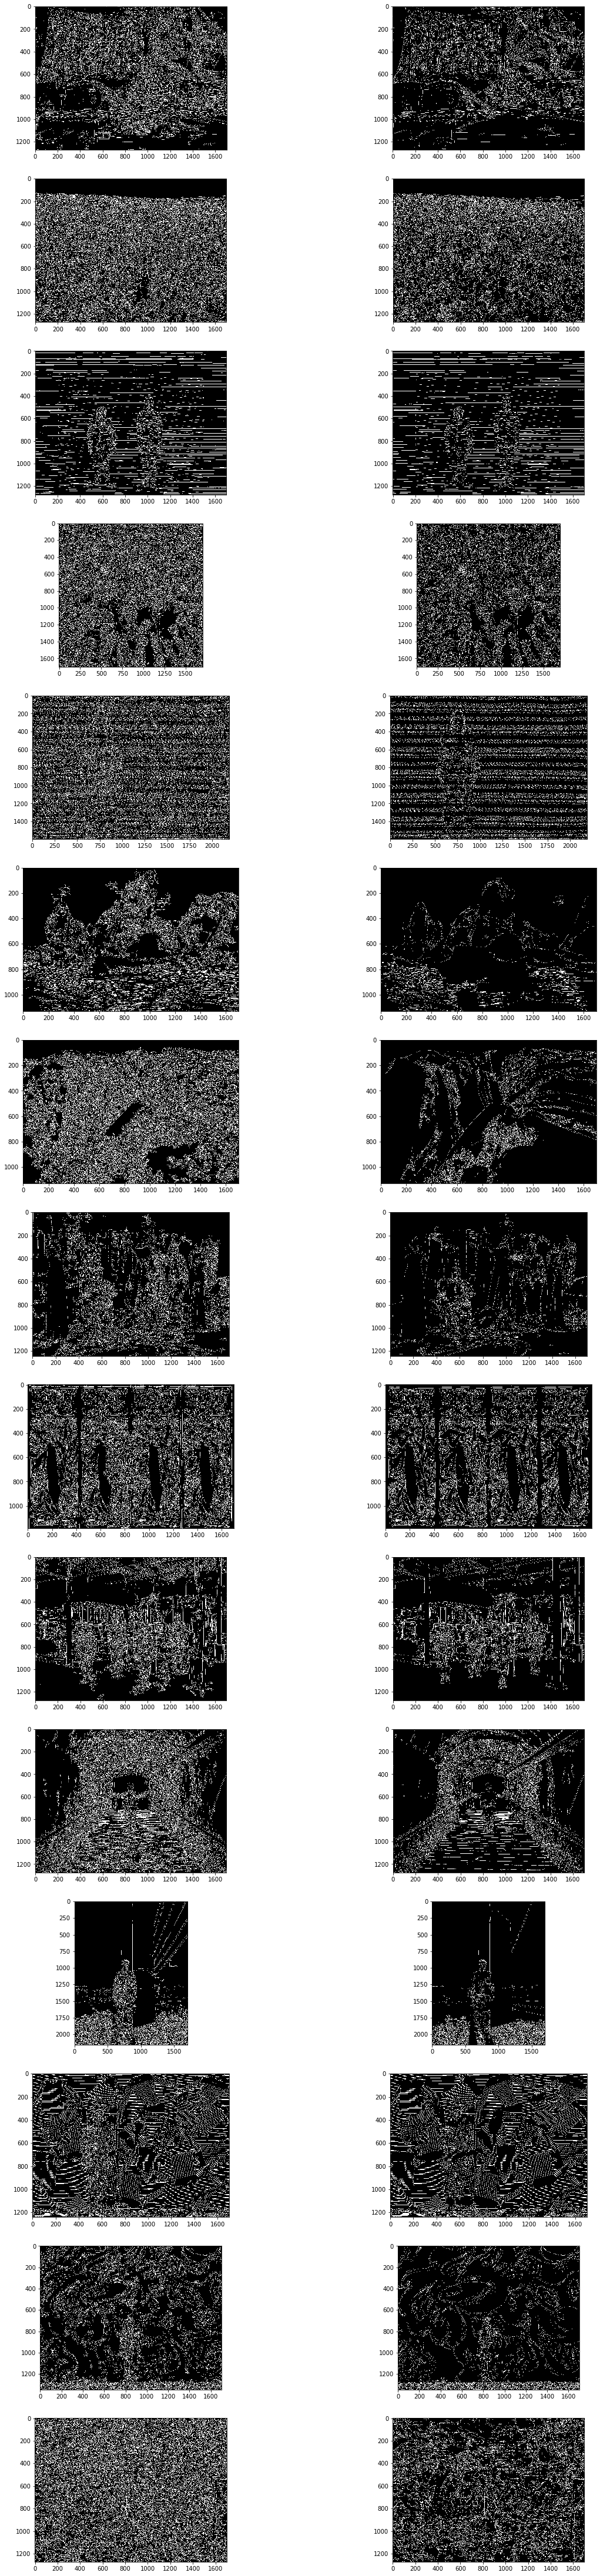

In [15]:
fig, axes = plt.subplots(num_images,2,figsize=(20,80))
    
for i in range(num_images):
    axes[i][0].imshow(edges[i],cmap = 'gray')
    axes[i][1].imshow(nlm_edges[i],cmap = 'gray')